In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import re

# load parser results
nnname = 'ResNet50'
paracsv = './/outputs//tf//'+nnname+'.csv'
df = pd.read_csv(paracsv)
df = df.fillna(0)
# Compressed Name by Capitals and digits
shortname=[]
for name in df['layer']:
    if re.sub('[^A-Z]', '', name)
    newname=re.sub('[^A-Z^0-9]', '', name)
    shortname.append(newname)
df['shortlayer']=shortname

In [9]:
#  Computaion costs v.s. Meomery cots 
xlabel='Layerid'
# computation cost:OpGemm, OpElem, OpActi(Gemm,Vector,Activations)
ylabel='OpGemm'
# Memory costs: SizeI, SizeO, SizeW(input output, weights)
zlabel='SizeO'
layers=0; layere=df.shape[0] # full sequence
#layers=10; layere=40 # selected sections
y=df.loc[layers:layere,ylabel]
z=df.loc[layers:layere,zlabel]

# display indices if too many layers; short layer name instead
if len(y)>40:
    x=range(len(y))
else:
    x=df.loc[layers:layere,'shortlayer']

<IPython.core.display.Javascript object>


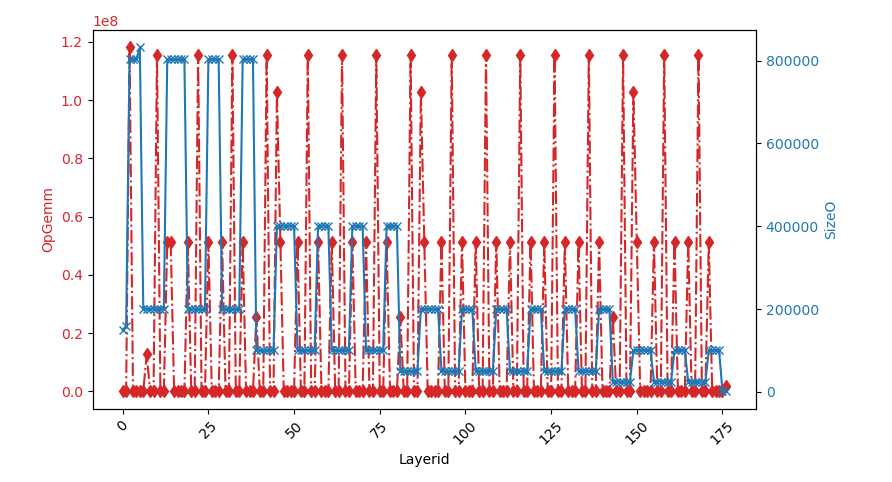

In [10]:
# viusalize the data at differnt scales
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel(xlabel)
ax1.tick_params(axis='x', labelrotation=45 )
ax1.set_ylabel(ylabel, color=color)
ax1.plot(x, y, 'd-.',color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(zlabel, color=color)  # we already handled the x-label with ax1
ax2.plot(x, z, 'x-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

## ！Click "close" button on the figure before continuing

In [11]:
# Compare Memory costs of difference sources: SizeI,SizeO,SizeW(Input， output，weights) 
xlabel='Layerid'
ylabel='SizeW'
zlabel='SizeO'
#layers=0; layere=df.shape[0] # full sequence
layers=10; layere=40 # selected sections
y=df.loc[layers:layere,ylabel]
z=df.loc[layers:layere,zlabel]
if len(y)>40:
    x=range(len(y))
else:
    x=df.loc[layers:layere,'shortlayer']

<IPython.core.display.Javascript object>


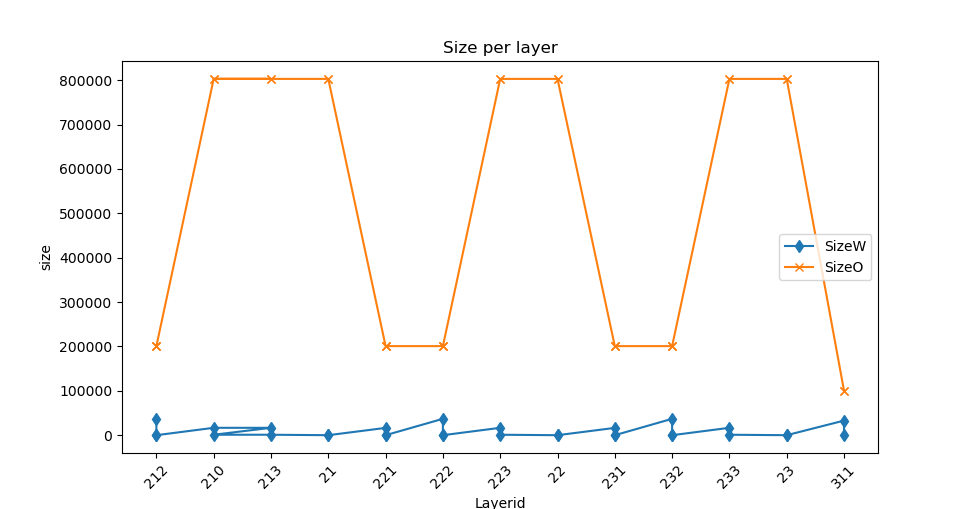

In [12]:
# Visualize
plt.plot(x, y, 'd-',label=ylabel)  # Plot some data on the (implicit) axes.
plt.plot(x, z, 'x-',label=zlabel)  # etc.
#plt.rcParams['figure.figsize'] = (32,16)
plt.xlabel(xlabel)
plt.ylabel('size')
plt.title("Size per layer")
plt.xticks(rotation=45)
plt.legend()
fig.tight_layout()